In [1]:
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#classification 
df=pd.read_csv("machine failure.csv")
df.head(10)
df[df['Machine failure']==1]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
50,51,L47230,L,298.9,309.1,2861,4.6,143,1,0,0,1,0,0
69,70,L47249,L,298.9,309.0,1410,65.7,191,1,0,0,1,1,0
77,78,L47257,L,298.8,308.9,1455,41.3,208,1,1,0,0,0,0
160,161,L47340,L,298.4,308.2,1282,60.7,216,1,0,0,0,1,0
161,162,L47341,L,298.3,308.1,1412,52.3,218,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9758,9759,L56938,L,298.6,309.8,2271,16.2,218,1,1,0,0,0,0
9764,9765,L56944,L,298.5,309.5,1294,66.7,12,1,0,0,1,0,0
9822,9823,L57002,L,298.5,309.4,1360,60.9,187,1,0,0,0,1,0
9830,9831,L57010,L,298.3,309.3,1337,56.1,206,1,0,0,0,1,0


In [3]:

pd.unique(df['Type'])

array(['M', 'L', 'H'], dtype=object)

In [4]:
df.nunique()


UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Machine failure                2
TWF                            2
HDF                            2
PWF                            2
OSF                            2
RNF                            2
dtype: int64

In [5]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Type']=le.fit_transform(df['Type'])
df['Machine failure'].value_counts()
df.drop(['UDI', 'Product ID'],axis=1,inplace=True)
pd.unique(df['Type'])

array([2, 1, 0])

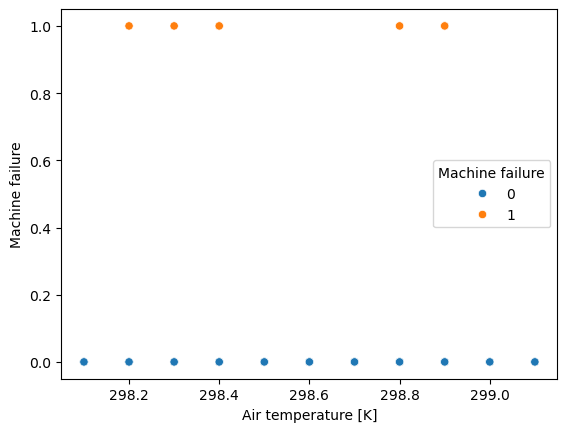

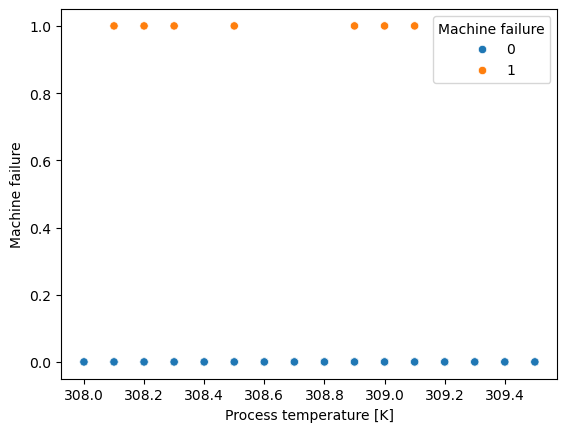

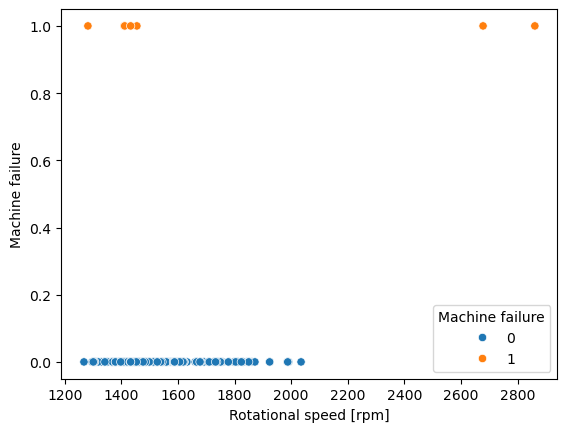

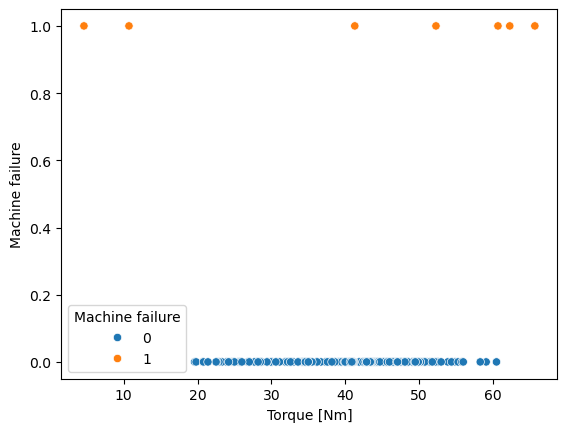

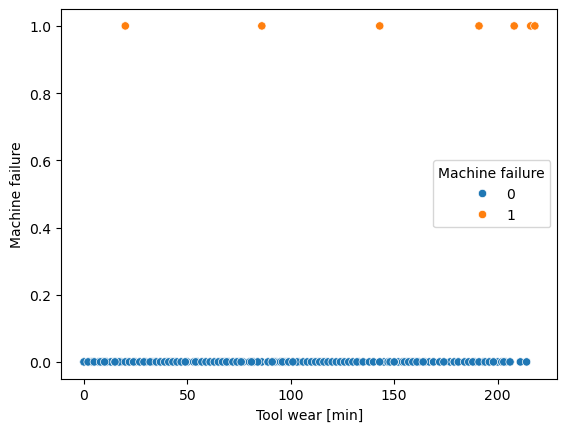

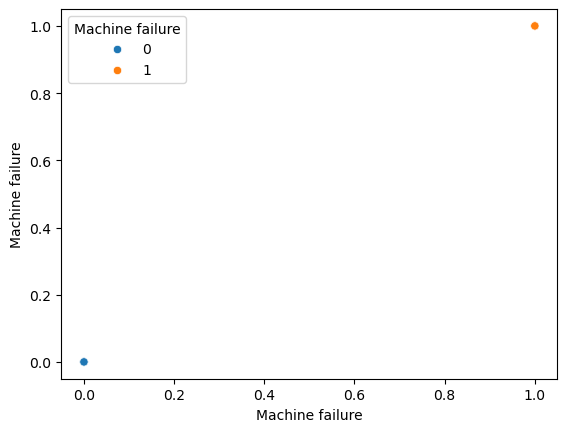

In [8]:
for i in df.columns[1:7]:
    sns.scatterplot(data=df.iloc[0:200],y='Machine failure',x=i,hue='Machine failure')
    plt.show()

<Axes: xlabel='Machine failure', ylabel='count'>

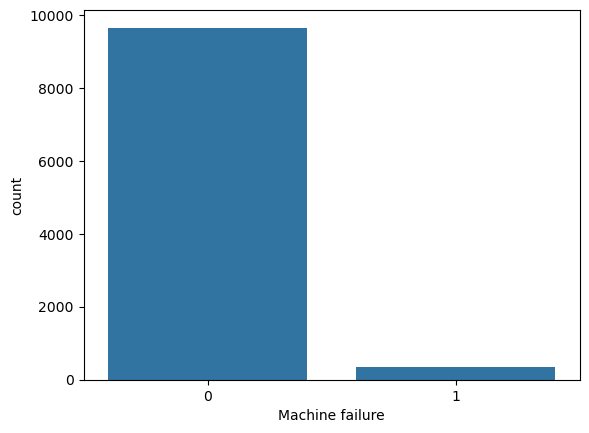

In [9]:
sns.countplot(x='Machine failure', data=df)


In [21]:
#pre processing 
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
y=df['Machine failure']
x_1=df[df['Machine failure']==1]
x=df.drop('Machine failure',axis=1)
df_minmax=minmax.fit_transform(x)
data=pd.DataFrame(df_minmax, columns=x.columns)
x=data

In [23]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=1,test_size=0.3)


In [25]:
#classification using logistic regression
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(xtrain,ytrain)
log.score(xtest,ytest)

0.9996666666666667

In [27]:
#RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
dtc.score(xtest,ytest)

0.9983333333333333

In [29]:
dtc.predict(xtest)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
xtest.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF',
       'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [33]:
from sklearn.preprocessing import MinMaxScaler
def predict(type,at,pt,rs,torque,tw,a,b,c,d,e):
    new_row_df = pd.DataFrame([[type,at,pt,rs,torque,tw,a,b,c,d,e]],
                          columns=['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF',
       'HDF', 'PWF', 'OSF', 'RNF'])
    minmax=MinMaxScaler()
    new_row_df=minmax.fit_transform(new_row_df)
    new_row_df = pd.DataFrame(new_row_df,
                          columns=['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF',
       'HDF', 'PWF', 'OSF', 'RNF'])
    return (int)(log.predict(new_row_df)[0])

In [35]:
predict(2,298.9,309.0,1410,65.7,191,0,0,1,1,0)

0